<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebooks/%E6%88%91%E7%9A%84%E8%82%A1%E7%A5%A8%E5%88%86%E6%9E%90%E7%AD%86%E8%A8%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 我的股票分析筆記

## 讀取股價歷史資料

In [ ]:
import requests
import pandas_datareader.data as web

In [ ]:
headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}

In [ ]:
# with requests.session() as s:
#   s.headers = headers

# df = web.DataReader('TSLA', 'yahoo', start='2010-01-01', session=s)

s = requests.session()
s.headers = headers

df = web.DataReader('TSLA', 'yahoo', start='2010-01-01', session=s)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-03,734.000000,724.200012,732.250000,733.570007,15246100.0,733.570007
2021-09-07,760.200012,739.260010,740.000000,752.919983,20039800.0,752.919983
2021-09-08,764.450012,740.770020,761.580017,753.869995,18793000.0,753.869995
2021-09-09,762.099976,751.630005,753.409973,754.859985,14077700.0,754.859985
2021-09-10,762.609985,734.520020,759.599976,736.270020,15114300.0,736.270020


## 練習一

請計算TSLA股價從上市第一天到現在漲了幾倍？

In [ ]:
df['Close'][-1]/df['Close'][0]

154.0958640313479

## 練習二

請計算TSLA從2010年以來，每一年的投資報酬率。

In [ ]:
df['2010']['Close'][-1]/df['2010']['Close'][0]

1.11469241307951

In [ ]:
x = 1.0

for i in range(12):
  year = str(2010 + i)
  ret = df[year]['Close'][-1]/df[year]['Close'][0]
  print(year, "==>", ret)
  x *= ret

x

2010 ==> 1.11469241307951
2011 ==> 1.072877539455723
2012 ==> 1.2061965733953064
2013 ==> 4.2542421279559335
2014 ==> 1.4817454285581042
2015 ==> 1.0943869279954357
2016 ==> 0.9564925410979382
2017 ==> 1.4348587991500041
2018 ==> 1.0382802646164202
2019 ==> 1.3489294904017222
2020 ==> 8.200506285659165
2021 ==> 1.0089069156392245


158.26189159352285

## 練習三

請繪製TSLA從2020年至今的收盤價曲線。

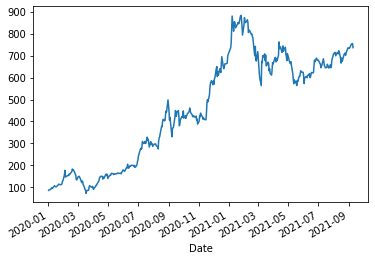

In [ ]:
df['2020':]['Close'].plot()

## 練習四

請繪製TSLA從2021年至今的成交量長條圖。

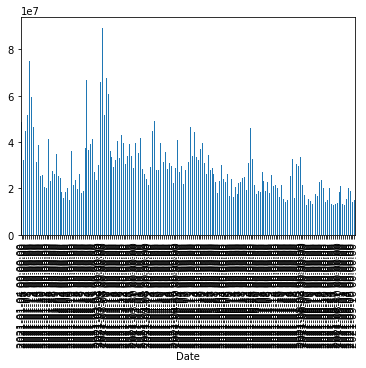

In [ ]:
df['2021']['Volume'].plot(kind='bar')

## 練習五

請繪製TSLA從2021年至今的K線圖。

https://github.com/matplotlib/mplfinance

In [ ]:
!pip install mplfinance

     |████████████████████████████████| 62 kB 661 kB/s 


In [ ]:
%config InlineBackend.figure_format = 'svg'

In [ ]:
import mplfinance as mpf

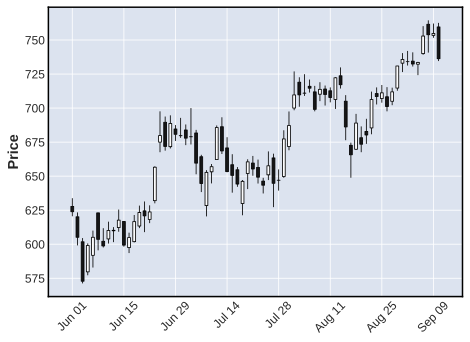

In [ ]:
mpf.plot(df['2021-06':],type='candle')

## 練習六

請繪製TSLA最後30筆資料的K線圖。

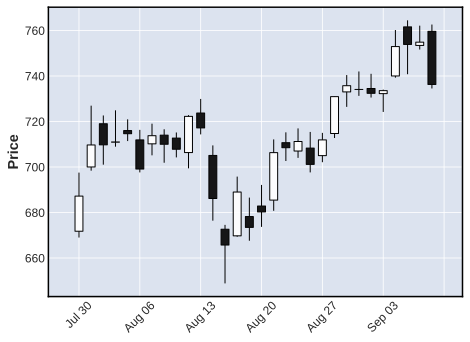

In [ ]:
mpf.plot(df.tail(30),type='candle')

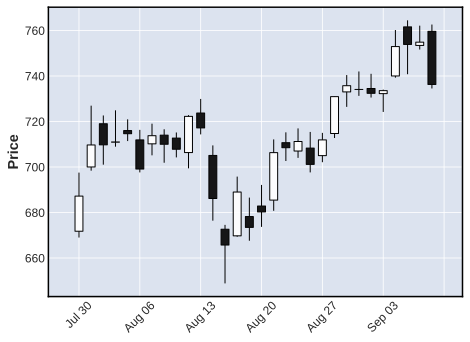

In [ ]:
mpf.plot(df[-30:],type='candle')